### Software Application

# Project Report: Retrieval-Augmented Generation (RAG) System


#### Group Member

##### Krishna Sai Mandadapu

## Introduction

### Overview

The Retrieval-Augmented Generation (RAG) system is a sophisticated AI solution that merges retrieval mechanisms with generative language models to produce accurate, contextually relevant, and coherent responses. This system addresses the need for generating precise information while ensuring that the outputs are based on reliable data sources.

The RAG system is particularly beneficial for businesses and research organizations that require accurate, up-to-date information. It supports tasks such as document summarization, answering specific user queries, and providing comprehensive insights by combining retrieval and generation functionalities.

---

## Objectives and Scope

### Objectives
- Design a system that can retrieve relevant documents from a vector database and generate responses using AI.
- Ensure the system can handle various file formats, including PDFs, CSVs, and DOCX files.
- Provide an easy-to-use interface for users to upload files, process data, and search through the processed content.
- Achieve high accuracy and efficiency in answering queries based on the uploaded files.

### Scope
- **Included**: The system processes user-uploaded files and indexes them into a vector database. User queries are answered based on the indexed data, ensuring contextual relevance.
- **Excluded**: Real-time web data retrieval or handling extremely large datasets beyond the vector database’s capacity.

### Development Cycle
The Agile methodology was adopted for developing the RAG system. Iterative sprints were used to develop, test, and refine features such as file processing, database integration, and search capabilities.

---



## System Design

### Requirements Engineering

#### Functional Requirements
- Upload and process files in various formats (PDF, CSV, DOCX).
- Store file data in a vector database for efficient retrieval.
- Provide a user interface for uploading files and querying the processed data.
- Return accurate responses that combine retrieved information and generative AI outputs.

#### Non-Functional Requirements
- **Usability**: Ensure the interface is user-friendly and supports multiple file uploads.
- **Performance**: Ensure fast query response times, even with multiple files.
- **Scalability**: Support expanding the vector database without significant performance degradation.
- **Security**: Protect sensitive user data by preventing unauthorized access.

### Requirements Sourcing
- Benchmarked against industry tools like GeminiAI’s RAG implementations and LangChain-based applications.
- Feedback was collected from potential end-users, such as academic researchers and business analysts, to tailor the system’s functionality.

---



## System Flowcharts

### Logical Flow of the RAG System

#### File Upload
1. User uploads files through the interface.
2. Files are pre-processed and split into smaller chunks for indexing.

#### Vector Database Storage
- Pre-processed chunks are embedded using vectorization techniques and stored in the Chroma database.

#### Query Processing
1. User enters a query.
2. Relevant documents are retrieved from the database.
3. Retrieved documents are passed to the generative model for crafting a coherent response.

#### Response Generation
- The system outputs a synthesized response with contextual insights, highlighting the sources used.

---



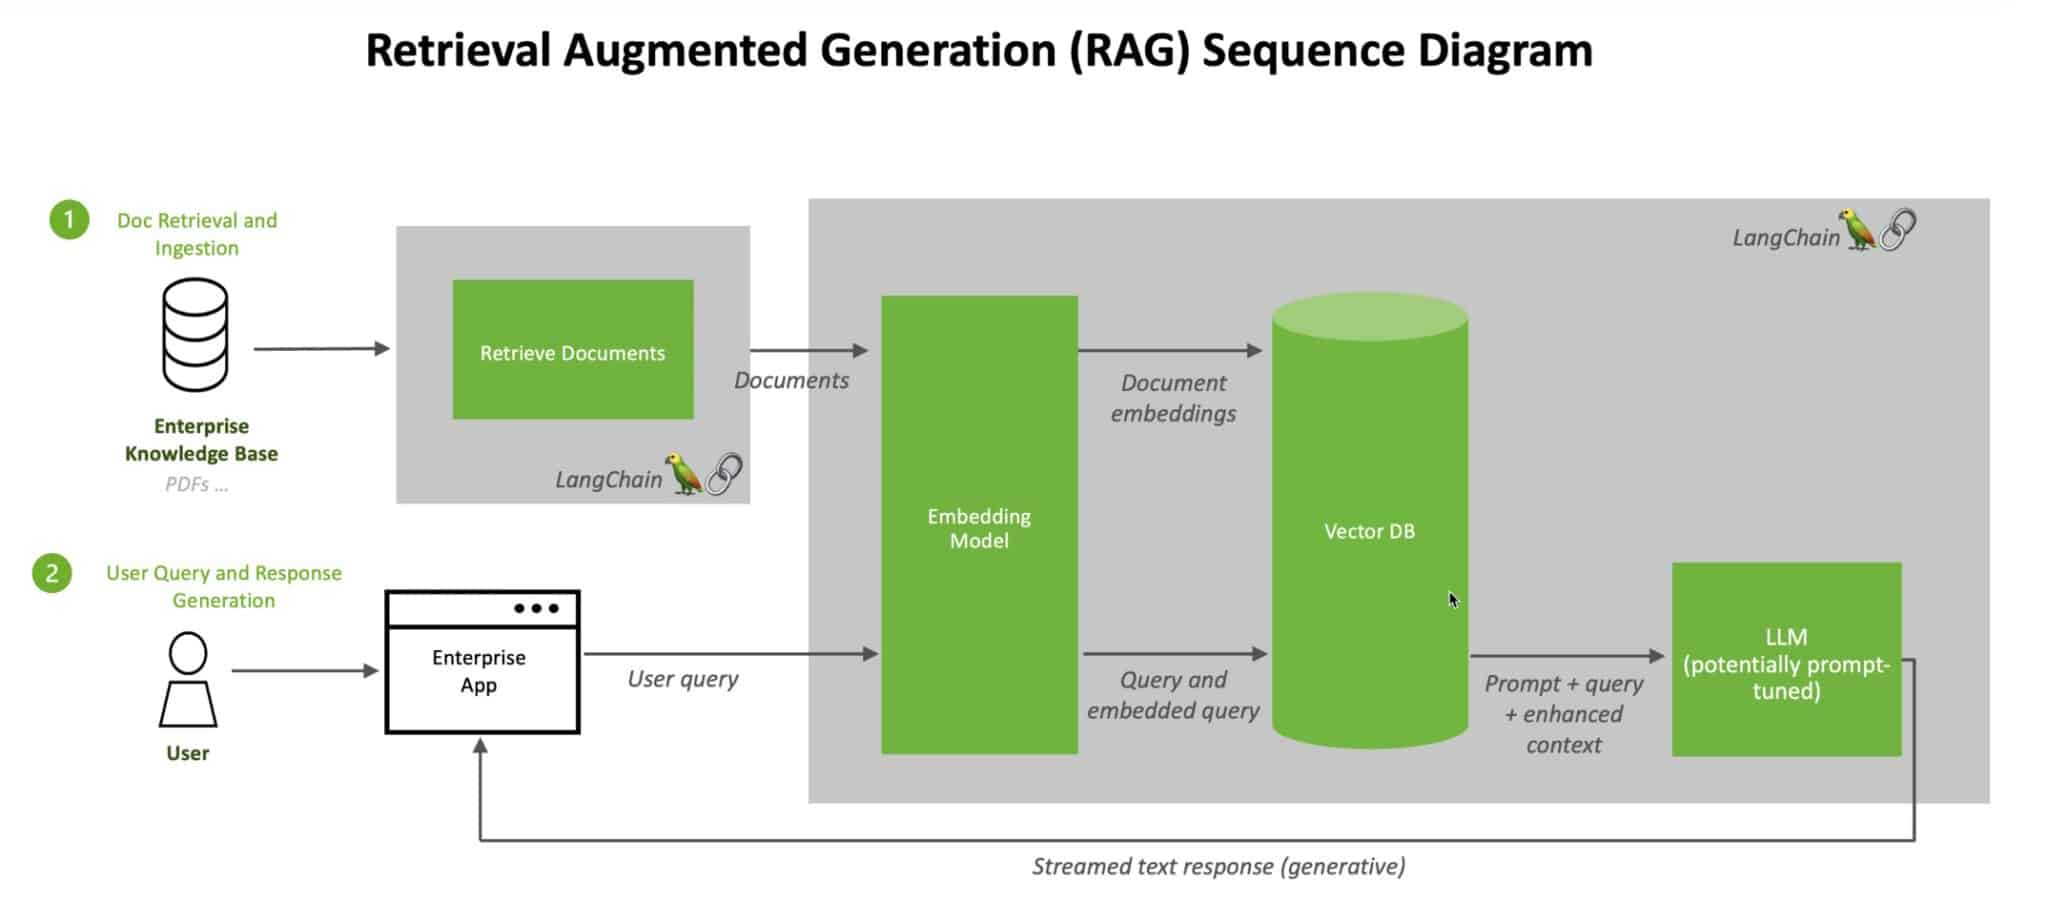
---




## Application Development

### Demonstration



#### File Upload
- Screenshot of the user interface where users upload files in PDF, DOCX, or CSV formats.


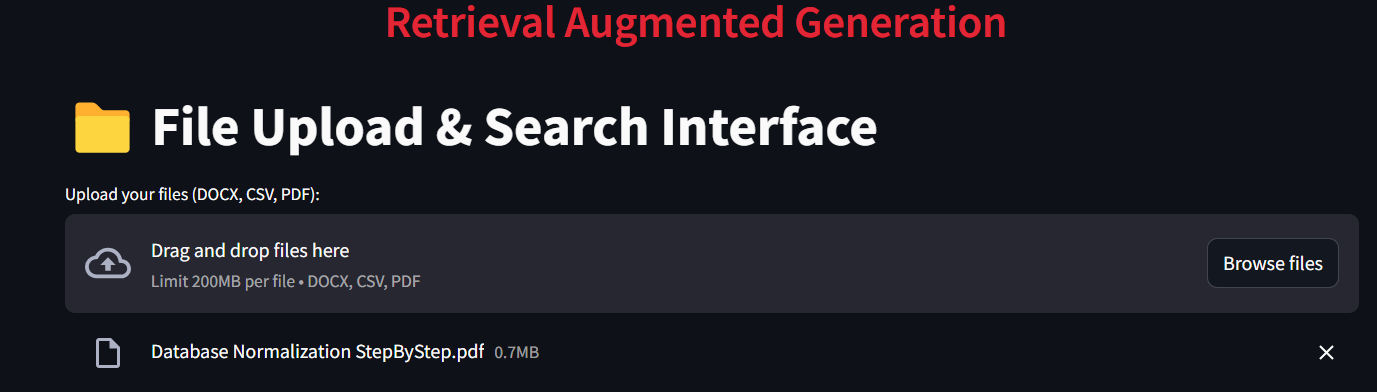

#### File Processing
- Screenshot of the system processing files and displaying progress (e.g., “Processing files…”).



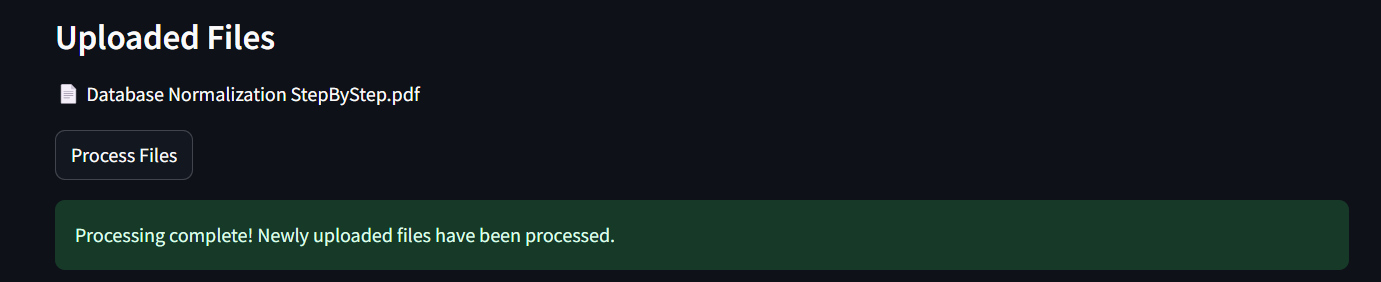

#### Query Search
- Screenshot of the search interface with a sample query and generated results.



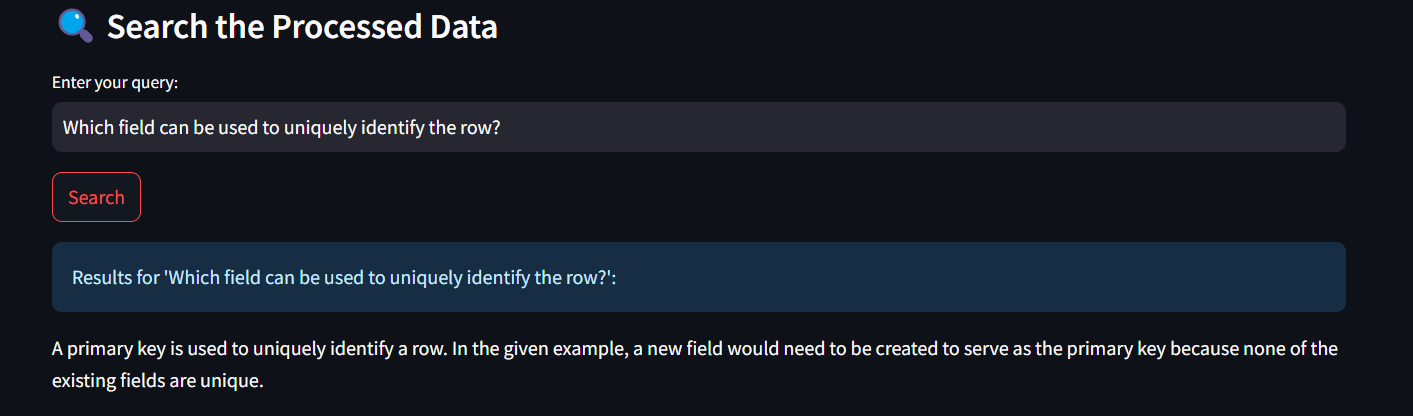

#### Response
- Screenshot showing detailed query results, retrieved chunks, and their sources.


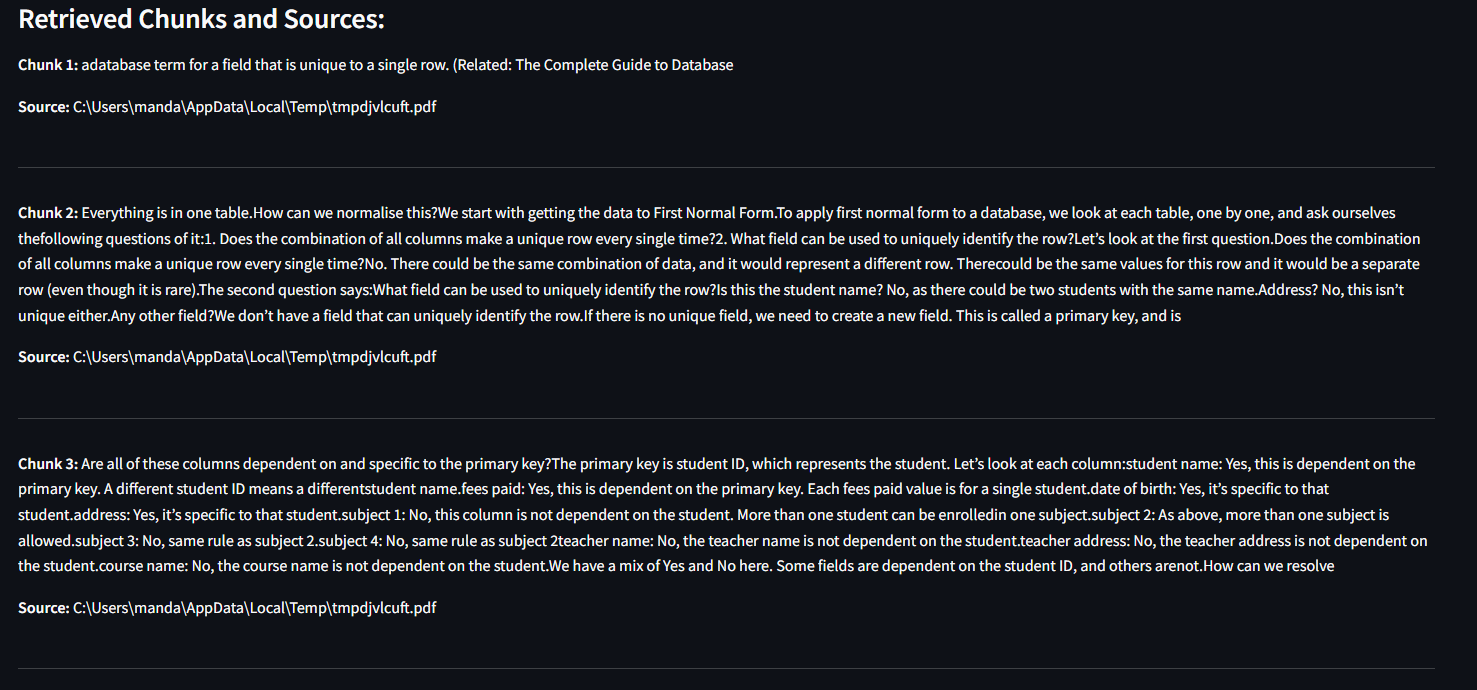


---



## Challenges and Resolutions

- **Challenge**: Handling duplicate files during upload.  
  **Resolution**: Introduced a file-tracking mechanism using `st.session_state` to ensure duplicates are detected and skipped.

- **Challenge**: Slow query processing with large datasets.  
  **Resolution**: Optimized vector database storage and retrieval algorithms for better performance.

---



## Conclusion

### Success Evaluation
The RAG system successfully achieved its objectives by providing a seamless interface for users to upload files, process data, and query relevant information. It combined retrieval-based methods and generative AI to deliver precise and contextually enriched responses.

### Limitations
- The system is limited by the size of the vector database, which may hinder scalability for larger datasets.
- Processing very large files or real-time web data was beyond the scope of the project.

### Future Improvements
- Implement support for dynamic data sources, such as APIs and real-time data streams.
- Enhance the scalability of the vector database for handling enterprise-level datasets.
- Improve the interface with advanced visualization features for retrieved data.


## Project Code

## Backend code


In [ ]:
import os
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_chroma import Chroma
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.document_loaders import Docx2txtLoader
from langchain_community.document_loaders import CSVLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from uuid import uuid4
from langchain.chains.question_answering import load_qa_chain
import tempfile



class Rag:
    def __init__(self):
        
        os.environ['google_api_key'] = 'API_KEY'
        self.llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro",google_api_key=os.getenv('google_api_key'))
        self.embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=os.getenv('google_api_key'))
    
        self.vector_store = Chroma(
            collection_name="test",
            embedding_function=self.embeddings,
            persist_directory="D:/Python_project",  
        )
        self.retriever = self.vector_store.as_retriever(search_type="mmr",
            search_kwargs={"k": 3, "fetch_k": 5, "lambda_mult": 0.5},
        )
        
    # Handle the files by storing the content as temp
    def handle_uploaded_files(self,uploaded_files):
        temp_file_paths = []

        for uploaded_file in uploaded_files:
            with tempfile.NamedTemporaryFile(delete=False, suffix=".pdf") as temp_file:
                temp_file.write(uploaded_file.read())  # Save file content to temp file
                temp_file_paths.append(temp_file.name)

        return temp_file_paths
    
    # Function to Process the PDF files
    def process_pdf_files(self, paths):
        
        pdf_chunks=[]
        for path in paths:
            
            loader = PyPDFLoader(path)
            docs = loader.load()
            text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=0)
            page_splits = text_splitter.split_documents(docs)
            for i, chunk in enumerate(page_splits, start=1):
                chunk.metadata['id'] = i
            pdf_chunks.extend(page_splits)

        return pdf_chunks
    #Function to Process the Document files
    def process_doc_files(self, paths):

        doc_chunks=[]
        for path in paths:
            loader = Docx2txtLoader(path)
            text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=0)
            docs=loader.load()
            page_splits = text_splitter.split_documents(docs)
            for i, chunk in enumerate(page_splits, start=1):
                chunk.metadata['id'] = i
            doc_chunks.extend(page_splits)

        return doc_chunks

    #Function to process the CSV File
    def process_csv_files(self, paths):

        csv_chunks=[]
        for path in paths:
            loader = CSVLoader(path)
            text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=0)
            docs=loader.load()
            page_splits = text_splitter.split_documents(docs)
            for i, chunk in enumerate(page_splits, start=1):
                chunk.metadata['id'] = i
            csv_chunks.extend(page_splits)

        return csv_chunks
        
    # Function to Handle the different file and then Process them Seperately 
    def process_uploaded_files(self, files):
        temp_file_paths = {"pdf": [], "csv": [], "docx": []}

        for uploaded_file in files:
            _, ext = os.path.splitext(uploaded_file.name)
            ext = ext.lower()

            with tempfile.NamedTemporaryFile(delete=False, suffix=ext) as temp_file:
                temp_file.write(uploaded_file.read())
                if ext == ".pdf":
                    temp_file_paths["pdf"].append(temp_file.name)
                elif ext == ".csv":
                    temp_file_paths["csv"].append(temp_file.name)
                elif ext == ".docx":
                    temp_file_paths["docx"].append(temp_file.name)
                  
            pdf_chunks = self.process_pdf_files(temp_file_paths["pdf"])
            csv_chunks = self.process_csv_files(temp_file_paths["csv"])
            docx_chunks = self.process_doc_files(temp_file_paths["docx"])
            if pdf_chunks:
                
                self.add_all_chunks_db(pdf_chunks)
            if csv_chunks:
                
                self.add_all_chunks_db(csv_chunks)
            if docx_chunks:
                
                self.add_all_chunks_db(docx_chunks)

    # Function to get the data for different processed files and store it to Vecore DataBase     
    def add_all_chunks_db(self, data):

        uuids = [str(uuid4()) for _ in range(len(data))]

        self.vector_store.add_documents(documents=data, ids=uuids)

    # Function to get the Result by sending the query and docs(TOP Chunks) to LLM by langchain
    def get_docs_summary(self, query):

        docs=self.retriever.invoke(query)
        chain = load_qa_chain(llm=self.llm, chain_type="stuff")
       
        result=chain.invoke({"input_documents":docs, "question":[query]})
        return result
    


## Frontend code

In [ ]:
import os
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_chroma import Chroma
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.document_loaders import Docx2txtLoader
from langchain_community.document_loaders import CSVLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from uuid import uuid4
import streamlit as st
import chromadb
from langchain_chroma import Chroma
from PIL import Image
from backend import *

# Function to get the Chunk count from Chroma DataBase
def get_vector_db_details():
   
    client = chromadb.PersistentClient(path="D:/Python_project")
    collection = client.get_collection(name="test") 
    db_details = {
        "Database Name": "Chroma Vector DataBase",
        "Collection Name": "test",
        "Number of Chunks": collection.count()
    }
    return db_details

# Sidebar Section
def load_sidebar():
    
    st.sidebar.image("D:/Python_project/txst.jpg", use_container_width=True)  # Replace with your logo path

    st.sidebar.title("📊 Vector Database Info")
    db_details = get_vector_db_details()
    for key, value in db_details.items():
        st.sidebar.write(f"**{key}:** {value}")

    st.sidebar.info("Ensure the database is active and connected.")
    
# Function to display the Browse Placeholder and showing the duplicated file placeholder
def upload_files(uploaded_files=[]):
    """Upload files and prevent duplicates."""
    st.title("📁 File Upload & Search Interface")
    new_uploaded_files = st.file_uploader(
        "Upload your files (DOCX, CSV, PDF):", 
        type=["docx", "csv", "pdf"], 
        accept_multiple_files=True
    ) 
    if new_uploaded_files:
        for file in new_uploaded_files:
            if file.name not in [f.name for f in uploaded_files]: 
                uploaded_files.append(file)
                
            else:
                st.warning(f"Duplicate file: {file.name}. This file has already been uploaded.")
    
    return uploaded_files

# Display Uploaded Files
def display_uploaded_files(files):
    if files:
        st.subheader("Uploaded Files")
        for file in files:
            st.write(f"📄 {file.name}")
    else:
        st.info("No files uploaded yet.")

# File Processing Placeholder
def process_files(obj,files):
    
    with st.spinner("Processing files..."):
        
        
        obj.process_uploaded_files(files)
        # st.success("Files processed successfully!")

# Search Bar Section
def search_interface(obj):
    st.subheader("🔍 Search the Processed Data")
    query = st.text_input("Enter your query:")
    if st.button("Search"):
        if query:
            
            result=obj.get_docs_summary(query)
            st.info(f"Results for '{query}':")
            st.write(result['output_text'])
            st.subheader("Retrieved Chunks and Sources:")
            for idx, item in enumerate(result['input_documents'], start=1):
                st.write(f"**Chunk {idx}:** {item.page_content}")
                st.write(f"**Source:** {item.metadata['source']}")
                st.divider() 
        else:
            st.error("Please enter a query to search.")

# Main File
def main():
    
    if "uploaded_files" not in st.session_state:
        st.session_state.uploaded_files = []
    
    st.set_page_config(layout="wide")
    obj = Rag()
    st.markdown("<h2 style='text-align: center; color: rgb(227, 38, 54);'>Retrieval Augmented Generation</h2>", unsafe_allow_html=True)
    load_sidebar()
    
    
    new_uploaded_files = upload_files()  
    display_uploaded_files(new_uploaded_files)
    
   
    if new_uploaded_files:
        
        new_files_to_process = [
            file for file in new_uploaded_files
            if file.name not in [f.name for f in st.session_state.uploaded_files]
        ]
        
        if st.button("Process Files"):  
            if new_files_to_process:
                
                process_files(obj, new_files_to_process)
                
                st.session_state.uploaded_files.extend(new_files_to_process)
                st.success("Processing complete! Newly uploaded files have been processed.")
            else:
                st.warning("No new files to process.")
            

    search_interface(obj)

if __name__ == "__main__":
    main()


### RAG UI

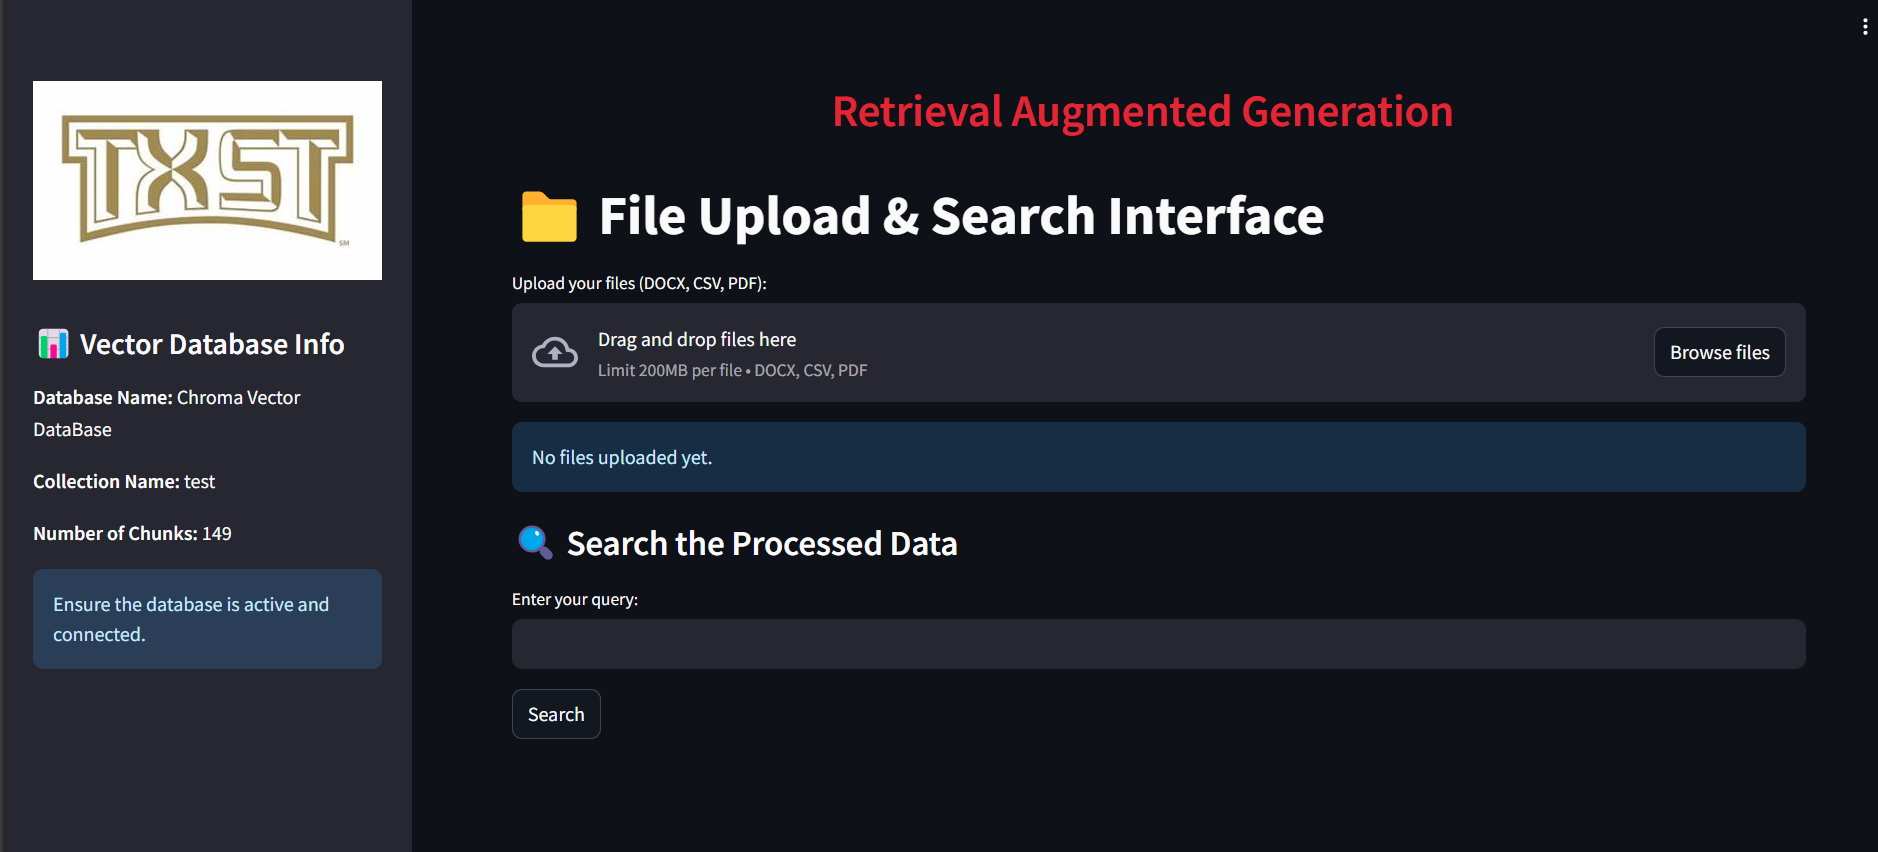